In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv('height_weight.csv')
data.head()
from sklearn.model_selection import train_test_split
np.random.seed(1234)
data_train, data_test = train_test_split(data, test_size=0.25)

In [3]:
from scipy.stats import norm

#la notazione sotto è una notazione compatta
#per definire una distribuzione normale e fittarla sui dati

#costruiamo due distribuzioni normali separate per i due set di dati
g_m = norm(*norm.fit(data_train[data_train['sex']=='M']['height']))
g_f = norm(*norm.fit(data_train[data_train['sex']=='F']['height']))

143.09196705483197 183.53015168789216
154.82061387831075 200.0566644722047


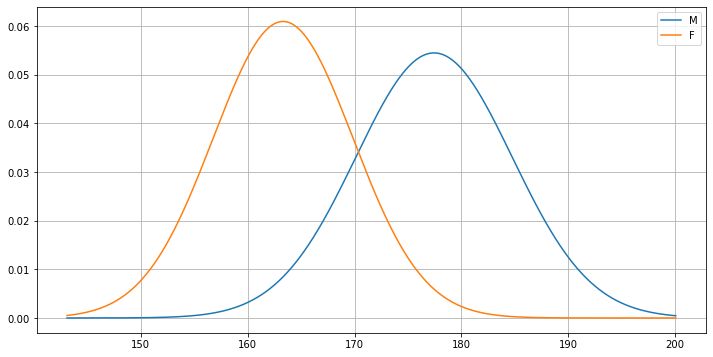

In [6]:
from matplotlib import pyplot as plt

x = np.linspace(g_f.ppf(0.001), g_m.ppf(0.999),1000)
print(g_f.ppf(0.001),g_f.ppf(0.999))
print(g_m.ppf(0.001),g_m.ppf(0.999))

plt.figure(figsize=(12,6))
plt.plot(x,g_m.pdf(x))
plt.plot(x,g_f.pdf(x))
plt.legend(['M','F'])
plt.grid()
plt.show()

In [9]:
prob_m=g_m.pdf(data_test['height'])
prob_f=g_f.pdf(data_test['height'])

pred_male = prob_m>=prob_f


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
male_gt = data_test['sex']=='M'
acc = accuracy_score(male_gt, pred_male)
cm = confusion_matrix(male_gt, pred_male)
cm=cm/cm.sum(1).reshape(-1,1)
_, fpr, _, tpr = cm.ravel()
print("False Positive Rate: {:0.2f}".format(fpr))
print("True Positive Rate: {:0.2f}".format(tpr))
print("Accuracy: {:0.2f}".format(acc))

False Positive Rate: 0.12
True Positive Rate: 0.81
Accuracy: 0.85


In [11]:
#Una funzione per risolvere l'equazione vista sopra
def risolvi(mu_1,mu_2,sigma_1,sigma_2):
    a = 1.0/(2*sigma_1**2) - 1.0/(2*sigma_2**2)
    b = mu_2/(sigma_2**2) - mu_1/(sigma_1**2)
    c = mu_1**2 /(2*sigma_1**2) - mu_2**2 / (2*sigma_2**2) - np.log(sigma_2/sigma_1)
    return np.roots([a,b,c])

solutions = risolvi(g_m.mean(),g_f.mean(),g_m.std(), g_f.std())
print(solutions)

[170.35818328  43.85968878]


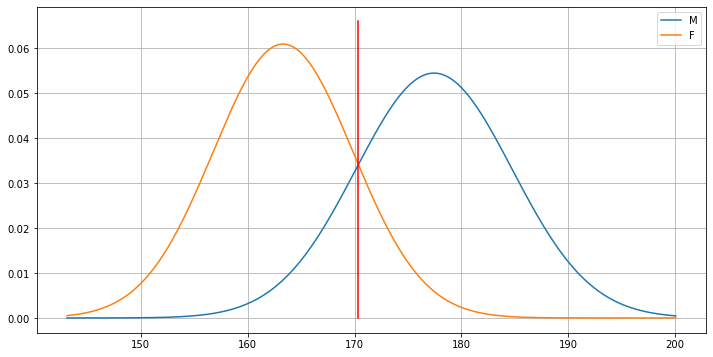

In [12]:
x = np.linspace(g_f.ppf(0.001), g_m.ppf(0.999),1000)

plt.figure(figsize=(12,6))
plt.plot(x,g_m.pdf(x))
plt.plot(x,g_f.pdf(x))
plt.legend(['M','F'])
plt.plot([solutions[0],solutions[0]],[0,0.066],'r')
plt.grid()
plt.show()

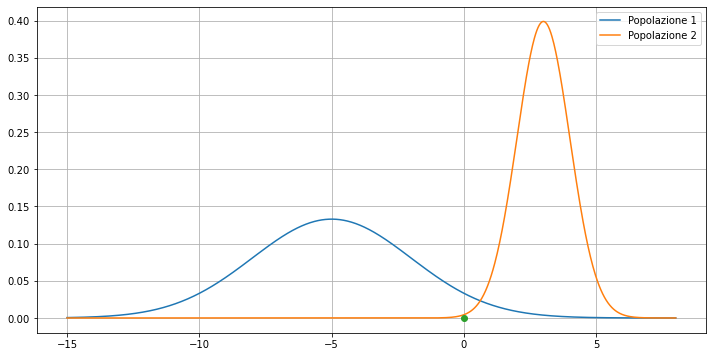

In [13]:
mu_1=-5
mu_2=3
sigma_1=3
sigma_2=1

g1 = norm(mu_1,sigma_1)
g2 = norm(mu_2,sigma_2)

x=0
plt.figure(figsize=(12,6))
dom=np.linspace(-15,8,1000)
plt.plot(dom,g1.pdf(dom))
plt.plot(dom,g2.pdf(dom))

plt.plot(x,'o')
plt.grid()
plt.legend(['Popolazione 1', 'Popolazione 2'])
plt.show()

In [14]:
dist_1 = ((x-mu_1)**2)**(1/2)
dist_2 = ((x-mu_2)**2)**(1/2)

print("Distanza dalla media della prima popolazione:",dist_1)
print("Distanza dalla media della seconda popolazione:",dist_2)

Distanza dalla media della prima popolazione: 5.0
Distanza dalla media della seconda popolazione: 3.0


In [15]:
print("Probabilità P(x | Popolazione = 1)=",g1.pdf(x))
print("Probabilità P(x | Popolazione = 2)=",g2.pdf(x))

Probabilità P(x | Popolazione = 1)= 0.03315904626424956
Probabilità P(x | Popolazione = 2)= 0.0044318484119380075


In [16]:
mx_p1 = float(x-mu_1)/sigma_1
mx_p2 = float(x-mu_2)/sigma_2

print(abs(mx_p1),abs(mx_p2))

1.6666666666666667 3.0


In [18]:
#calcoliamo le distanze per i dati di test
#utilizzando media e varianza calcoalte sul training set
dist_male = (data_test.height-g_m.mean())/g_m.std()
dist_female = (data_test.height-g_f.mean())/g_f.std()
print(dist_female,dist_male)

2322   -0.114790
3890    2.602658
359     0.661624
3473    2.602658
2583    1.049831
          ...   
3613   -1.279410
1806    2.602658
4043    2.214451
3305    0.273417
667    -0.114790
Name: height, Length: 1058, dtype: float64 2322   -2.032823
3890    0.396404
359    -1.338758
3473    0.396404
2583   -0.991726
          ...   
3613   -3.073921
1806    0.396404
4043    0.049372
3305   -1.685791
667    -2.032823
Name: height, Length: 1058, dtype: float64


In [19]:
pred_male=np.abs(dist_male)<np.abs(dist_female)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
acc = accuracy_score(male_gt, pred_male)
cm = confusion_matrix(male_gt, pred_male)
cm=cm/cm.sum(1).reshape(-1,1)
_, fpr, _, tpr = cm.ravel()
print("False Positive Rate: {:0.2f}".format(fpr))
print("True Positive Rate: {:0.2f}".format(tpr))
print("Accuracy: {:0.2f}".format(acc))

False Positive Rate: 0.20
True Positive Rate: 0.88
Accuracy: 0.83


In [23]:
g_m_h = norm(*norm.fit(data_train[data_train['sex']=='M']['height']))
g_f_h = norm(*norm.fit(data_train[data_train['sex']=='F']['height']))
g_m_w = norm(*norm.fit(data_train[data_train['sex']=='M']['weight']))
g_f_w = norm(*norm.fit(data_train[data_train['sex']=='F']['weight']))

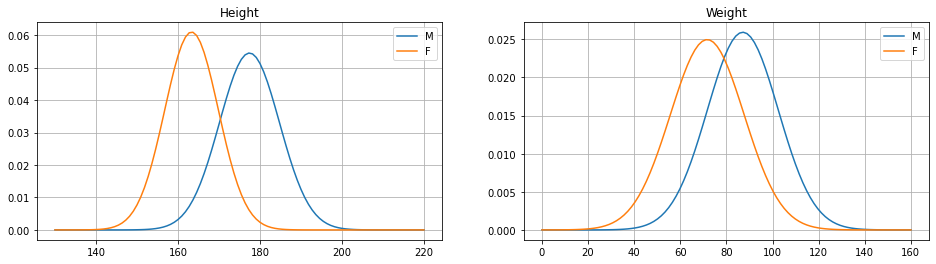

In [24]:
plt.figure(figsize=(16,4))
dom=np.linspace(130,220,100)
plt.subplot(121)
plt.plot(dom,g_m_h.pdf(dom))
plt.plot(dom,g_f_h.pdf(dom))
plt.grid()
plt.title('Height')
plt.legend(['M','F'])

dom2=np.linspace(0,160,100)
plt.subplot(122)
plt.plot(dom2,g_m_w.pdf(dom2))
plt.plot(dom2,g_f_w.pdf(dom2))
plt.grid()
plt.title('Weight')
plt.legend(['M','F'])

plt.show()

In [25]:
pm = g_m_h.pdf(data_test['height'])*g_m_w.pdf(data_test['weight'])
pf = g_f_h.pdf(data_test['height'])*g_f_w.pdf(data_test['weight'])

In [26]:
male_pred = pm>=pf
male_pred

array([False,  True, False, ...,  True, False, False])

In [27]:
accuracy_score(male_gt,male_pred)

0.8506616257088847

In [28]:
from sklearn.naive_bayes import GaussianNB

#passiamo priors=[0.5, 0.5] per assumere probabilità a priori uniformi
model = GaussianNB(priors=[0.5,0.5])
#effettuiamo il fit del modello mediante il metodo fit
model.fit(data_train[['height','weight']],data_train['sex'])

GaussianNB(priors=[0.5, 0.5])

In [29]:
model.predict(data_test[['height','weight']])

array(['F', 'M', 'F', ..., 'M', 'F', 'F'], dtype='<U1')

In [30]:
model.score(data_test[['height','weight']],data_test['sex'])

0.8506616257088847

In [31]:
model = GaussianNB(priors=[0.5,0.5])
model.fit(data_train[['height','weight','BMI']],data_train['sex'])
model.score(data_test[['height','weight','BMI']],data_test['sex'])

0.8572778827977315

In [32]:
model = GaussianNB()
#dobbiamo inserire values.reshape(-1,1) per trasformare il vettore monodimensionale
#in una matrice Nx1 (N osservazion, una variabile)
model.fit(data_train['height'].values.reshape(-1,1),data_train['sex'])
model.score(data_test['height'].values.reshape(-1,1),data_test['sex'])

0.8478260869565217